In [4]:
!pip install pandas numpy matplotlib seaborn sqlalchemy scikit-learn google-cloud-storage


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Settings
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')


In [17]:
from google.colab import drive
drive.mount('/content/drive')

# Fix: properly quoted path with parentheses
!unzip "/content/drive/MyDrive/test_data (1).zip" -d /content/data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/test_data (1).zip
   creating: /content/data/test_data/
  inflating: /content/data/test_data/.DS_Store  
  inflating: /content/data/__MACOSX/test_data/._.DS_Store  
   creating: /content/data/test_data/training_content/
   creating: /content/data/test_data/testing_content/
   creating: /content/data/test_data/event/
   creating: /content/data/test_data/devices/
  inflating: /content/data/test_data/training_content/part-00000-a34a1545-5cf1-47b9-93c2-29c1d3f0bfb7-c000.csv  
  inflating: /content/data/test_data/training_content/_SUCCESS  
  inflating: /content/data/test_data/testing_content/_SUCCESS  
  inflating: /content/data/test_data/testing_content/part-00000-8be13c58-b74d-4e30-8877-c8b5e168035a-c000.csv  
  inflating: /content/data/test_data/event/part-00003-7e210b01-29d8-430f-988f-d3e3b34da614-c000.csv  
  inflating: /cont

In [23]:
content_train = pd.read_csv(
    train_content_path,
    on_bad_lines='skip',        # ✅ This replaces error_bad_lines
    engine='python'             # more forgiving parser
)

print("Train content:", content_train.shape)
content_train.head()


Train content: (6951, 12)


,hashid,title,content,newsType,author,categories,hashtags,newsDistrict,createdAt,updatedAt,newsLanguage,sourceName
0,q6ymyudu-1,The world's most picturesque road trip awaits ...,The world's most picturesque road trip awaits ...,VIDEO_NEWS,5748e05c947ce445479635a0,travel,NaN,NaN,2023-06-04T08:30:15.000Z,2023-06-04T08:30:15.000Z,english,NaN
1,vowkjbc6-1,"In a viral video, Kathak dancers perform in a ...","In a viral video, Kathak dancers perform in a ...",VIDEO_NEWS,5748e05c947ce445479635a0,entertainment,NaN,NaN,2023-06-05T15:02:18.000Z,2023-06-05T15:02:18.000Z,english,NaN
2,8bf90wsx-1,Would you like to be a part of the 'no wash' m...,Would you like to be a part of the 'no wash' m...,VIDEO_NEWS,5748e05c947ce445479635a0,hatke,NaN,NaN,2023-06-02T09:22:13.000Z,2023-06-02T09:22:13.000Z,english,NaN
3,j0p0fukx-1,Switzerland's legendary Bernina Express turns 50,Switzerland's legendary Bernina Express turns 50,VIDEO_NEWS,5748e05c947ce445479635a0,travel,NaN,NaN,2023-06-04T13:24:40.000Z,2023-06-04T13:24:40.000Z,english,NaN
4,naqusao7-1,"Explored by many, claimed by none, this is Bir...","Explored by many, claimed by none, this is Bir...",VIDEO_NEWS,5748e05c947ce445479635a0,"hatke,travel",NaN,NaN,2023-06-04T13:20:20.000Z,2023-06-04T13:20:20.000Z,english,NaN


In [24]:
# Just to check structure
content_train_preview = pd.read_csv(train_content_path, nrows=20)
content_train_preview.head()


,hashid,title,content,newsType,author,categories,hashtags,newsDistrict,createdAt,updatedAt,newsLanguage,sourceName
0,q6ymyudu-1,The world's most picturesque road trip awaits ...,The world's most picturesque road trip awaits ...,VIDEO_NEWS,5748e05c947ce445479635a0,travel,NaN,NaN,2023-06-04T08:30:15.000Z,2023-06-04T08:30:15.000Z,english,NaN
1,vowkjbc6-1,"In a viral video, Kathak dancers perform in a ...","In a viral video, Kathak dancers perform in a ...",VIDEO_NEWS,5748e05c947ce445479635a0,entertainment,NaN,NaN,2023-06-05T15:02:18.000Z,2023-06-05T15:02:18.000Z,english,NaN
2,8bf90wsx-1,Would you like to be a part of the 'no wash' m...,Would you like to be a part of the 'no wash' m...,VIDEO_NEWS,5748e05c947ce445479635a0,hatke,NaN,NaN,2023-06-02T09:22:13.000Z,2023-06-02T09:22:13.000Z,english,NaN
3,j0p0fukx-1,Switzerland's legendary Bernina Express turns 50,Switzerland's legendary Bernina Express turns 50,VIDEO_NEWS,5748e05c947ce445479635a0,travel,NaN,NaN,2023-06-04T13:24:40.000Z,2023-06-04T13:24:40.000Z,english,NaN
4,naqusao7-1,"Explored by many, claimed by none, this is Bir...","Explored by many, claimed by none, this is Bir...",VIDEO_NEWS,5748e05c947ce445479635a0,"hatke,travel",NaN,NaN,2023-06-04T13:20:20.000Z,2023-06-04T13:20:20.000Z,english,NaN


In [25]:
# Summary info
content_train.info()

# Count missing values
print("\nNulls:\n", content_train.isnull().sum())

# Unique values per column
print("\nUnique values:\n", content_train.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hashid        6951 non-null   object
 1   title         6951 non-null   object
 2   content       6951 non-null   object
 3   newsType      6644 non-null   object
 4   author        6946 non-null   object
 5   categories    6939 non-null   object
 6   hashtags      992 non-null    object
 7   newsDistrict  27 non-null     object
 8   createdAt     6951 non-null   object
 9   updatedAt     6951 non-null   object
 10  newsLanguage  6865 non-null   object
 11  sourceName    6770 non-null   object
dtypes: object(12)
memory usage: 651.8+ KB

Nulls:
 hashid             0
title              0
content            0
newsType         307
author             5
categories        12
hashtags        5959
newsDistrict    6924
createdAt          0
updatedAt          0
newsLanguage      86
sourceName       181
d

In [26]:
# Convert dates
content_train['createdAt'] = pd.to_datetime(content_train['createdAt'], errors='coerce')
content_train['updatedAt'] = pd.to_datetime(content_train['updatedAt'], errors='coerce')

# Optional: Drop columns that are too sparse
content_train.drop(columns=['newsDistrict'], inplace=True)


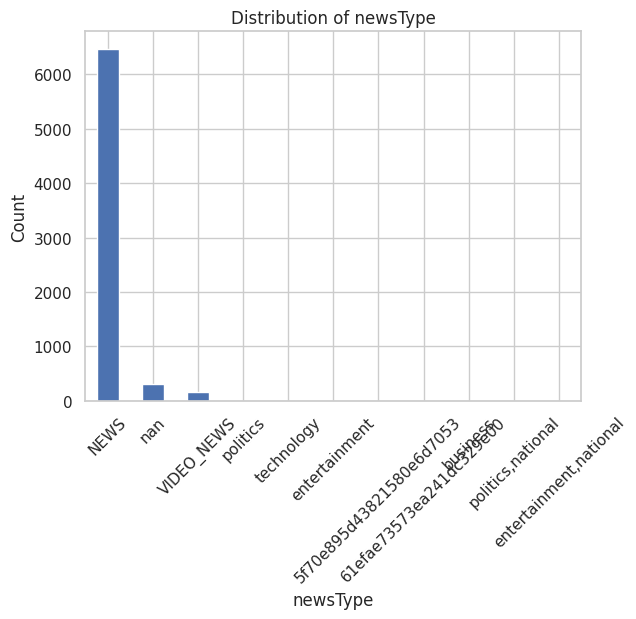

In [27]:
content_train['newsType'].value_counts(dropna=False).plot(kind='bar', title='Distribution of newsType')
plt.ylabel('Count')
plt.xlabel('newsType')
plt.xticks(rotation=45)
plt.show()


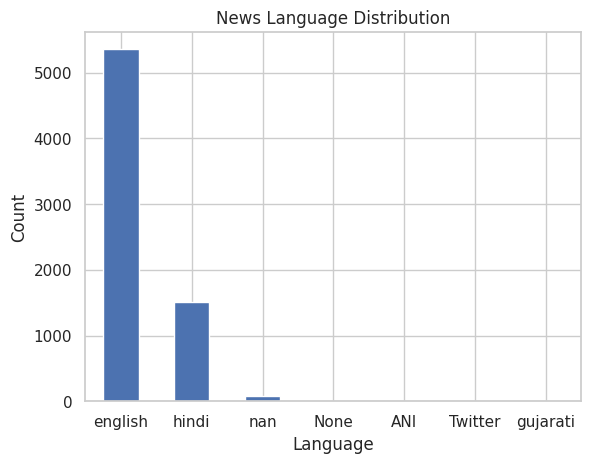

In [28]:
content_train['newsLanguage'].value_counts(dropna=False).plot(kind='bar', title='News Language Distribution')
plt.ylabel('Count')
plt.xlabel('Language')
plt.xticks(rotation=0)
plt.show()


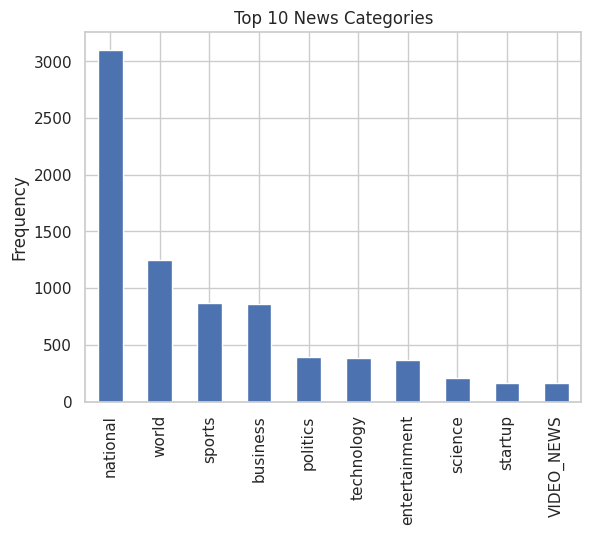

In [29]:
from collections import Counter

# Explode category lists
all_categories = content_train['categories'].dropna().str.split(',').sum()
top_categories = pd.Series(Counter(all_categories)).sort_values(ascending=False).head(10)

top_categories.plot(kind='bar', title='Top 10 News Categories')
plt.ylabel('Frequency')
plt.show()


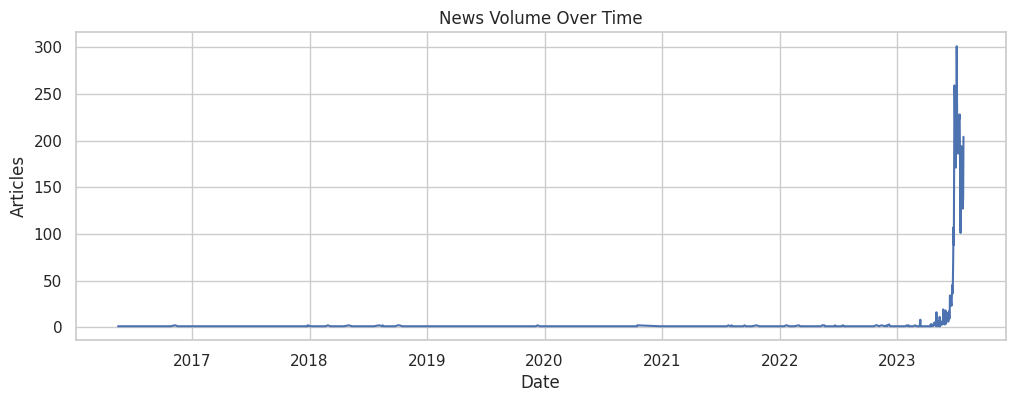

In [30]:
content_train['createdAt'] = pd.to_datetime(content_train['createdAt'], errors='coerce')

# Plot publish volume by day
content_train['createdAt'].dt.date.value_counts().sort_index().plot(figsize=(12,4), title='News Volume Over Time')
plt.ylabel('Articles')
plt.xlabel('Date')
plt.show()


In [31]:
devices = pd.read_csv(devices_path)

print("Shape:", devices.shape)
print("\nColumns:\n", devices.columns.tolist())
devices.head()


Shape: (10400, 11)

Columns:
 ['deviceid', 'platform', 'os_version', 'model', 'networkType', 'district', 'lastknownsubadminarea', 'language_selected', 'created_datetime', 'app_updated_at', 'last_active_at']


,deviceid,platform,os_version,model,networkType,district,lastknownsubadminarea,language_selected,created_datetime,app_updated_at,last_active_at
0,197b123e-eb9e-4fc1-a32d-aa86aaea425e,ANDROID,13,NaN,4G,NaN,NaN,en,2023-07-11T13:40:05.511Z,NaN,2023-07-11T13:40:02.000Z
1,3c33c537-7c6c-40f5-835c-f997e883cae2,ANDROID,13,NaN,4G,NaN,NaN,en,2023-07-11T15:36:58.363Z,NaN,2023-07-11T16:24:44.000Z
2,6c7be5d0-d4d8-469f-91be-8055021ceef9,ANDROID,12,NaN,NO INTERNET,NaN,NaN,en,2023-07-11T11:25:39.375Z,NaN,2023-07-11T10:13:18.000Z
3,0801af66-0a6f-4fdd-82a9-c2b15757b8f5,ANDROID,7.0,NaN,NO INTERNET,NaN,NaN,en,2023-04-30T00:24:48.987Z,NaN,2023-07-10T11:53:21.000Z
4,78b3c7a7-5881-42dc-9f8e-b4fc27f94360,ANDROID,13,NaN,4G,NaN,NaN,en,2023-04-15T05:48:46.923Z,NaN,2023-07-20T15:37:47.000Z


In [32]:
devices.info()
devices.isnull().sum()
devices.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10400 entries, 0 to 10399
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   deviceid               10400 non-null  object
 1   platform               10400 non-null  object
 2   os_version             10400 non-null  object
 3   model                  10344 non-null  object
 4   networkType            10352 non-null  object
 5   district               21 non-null     object
 6   lastknownsubadminarea  9492 non-null   object
 7   language_selected      10400 non-null  object
 8   created_datetime       10400 non-null  object
 9   app_updated_at         7236 non-null   object
 10  last_active_at         10400 non-null  object
dtypes: object(11)
memory usage: 893.9+ KB


,0
deviceid,10400
platform,1
os_version,16
model,985
networkType,5
district,20
lastknownsubadminarea,1157
language_selected,1
created_datetime,10400
app_updated_at,104


In [33]:
devices.drop(columns=[
    'platform', 'district', 'language_selected', 'app_updated_at'  # low variance or high missing
], inplace=True)


In [34]:
devices['created_datetime'] = pd.to_datetime(devices['created_datetime'], errors='coerce')
devices['last_active_at'] = pd.to_datetime(devices['last_active_at'], errors='coerce')


In [35]:
devices['device_lifetime_days'] = (devices['last_active_at'] - devices['created_datetime']).dt.days
devices['device_lifetime_days'].describe()


,device_lifetime_days
count,10400.000000
mean,74.685962
std,27.278490
min,-1.000000
25%,70.000000
50%,81.000000
75%,91.000000
max,107.000000


In [36]:
# Remove logically inconsistent records
devices = devices[devices['device_lifetime_days'] >= 0]
print("Cleaned devices shape:", devices.shape)


Cleaned devices shape: (9968, 8)


In [39]:
import glob
import os

events_path = "/content/data/test_data/event"
event_parts = sorted(glob.glob(os.path.join(events_path, "part-*.csv")))
print("Event files found:", len(event_parts))
event_parts


Event files found: 4


['/content/data/test_data/event/part-00000-7e210b01-29d8-430f-988f-d3e3b34da614-c000.csv',
 '/content/data/test_data/event/part-00001-7e210b01-29d8-430f-988f-d3e3b34da614-c000.csv',
 '/content/data/test_data/event/part-00002-7e210b01-29d8-430f-988f-d3e3b34da614-c000.csv',
 '/content/data/test_data/event/part-00003-7e210b01-29d8-430f-988f-d3e3b34da614-c000.csv']

In [40]:
event_sample = pd.read_csv(event_parts[0], nrows=50000)
print(event_sample.shape)
event_sample.head()


(50000, 13)


,deviceId,event_type,eventTimestamp,hashId,categoryWhenEventHappened,cardViewPosition,overallTimeSpent,searchTerm,relevancy_color,relevancy_topic,state,locality,district
0,7cb933f6-0a5b-477e-bb5d-42eb4b771970,TimeSpent-Front,1689189015000,2k4lruyx-1,My Feed,13.0,2.165,NaN,NaN,NaN,NaN,NaN,NaN
1,a1bfc2e4-c03e-4c1b-8abb-215808a89e6a,TimeSpent-Front,1689182865000,2k4lruyx-1,My Feed,17.0,3.306,NaN,NaN,NaN,NaN,NaN,NaN
2,1c53a149-303d-486e-ac62-0b9c9e469cda,TimeSpent-Front,1689180216000,2k4lruyx-1,My Feed,17.0,4.695,NaN,NaN,NaN,NaN,NaN,NaN
3,fea7a467-551c-4b64-ad48-eae0693635f3,TimeSpent-Front,1689173651000,2kk4ydgg-1,My Feed,25.0,4.238,NaN,NaN,NaN,NaN,NaN,NaN
4,1ef62ab0-e5da-4cb4-9839-49ac52f04ceb,TimeSpent-Front,1689174004000,2kk4ydgg-1,My Feed,12.0,0.931,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
event_sample.info()
event_sample.isnull().sum()
event_sample.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   deviceId                   50000 non-null  object 
 1   event_type                 50000 non-null  object 
 2   eventTimestamp             50000 non-null  int64  
 3   hashId                     50000 non-null  object 
 4   categoryWhenEventHappened  49962 non-null  object 
 5   cardViewPosition           49985 non-null  float64
 6   overallTimeSpent           49985 non-null  float64
 7   searchTerm                 15 non-null     object 
 8   relevancy_color            16 non-null     object 
 9   relevancy_topic            16 non-null     object 
 10  state                      576 non-null    object 
 11  locality                   691 non-null    object 
 12  district                   576 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usa

,0
deviceId,4091
event_type,7
eventTimestamp,46952
hashId,2349
categoryWhenEventHappened,7
cardViewPosition,314
overallTimeSpent,18617
searchTerm,15
relevancy_color,3
relevancy_topic,6


In [42]:
event_sample['event_datetime'] = pd.to_datetime(event_sample['eventTimestamp'], unit='ms', errors='coerce')


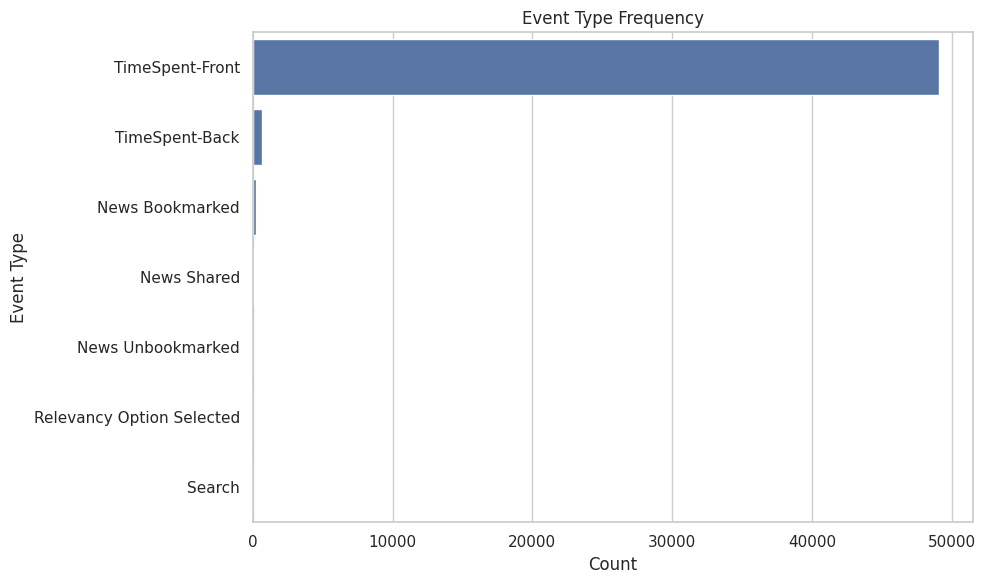

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=event_sample, y='event_type', order=event_sample['event_type'].value_counts().index)
plt.title('Event Type Frequency')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.tight_layout()
plt.show()



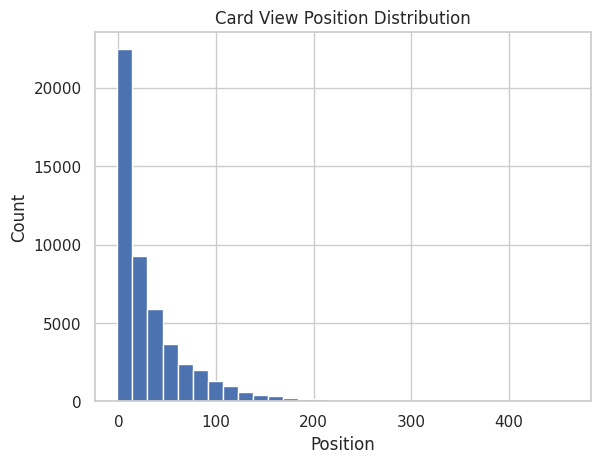

In [45]:
event_sample['cardViewPosition'].hist(bins=30)
plt.title('Card View Position Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()


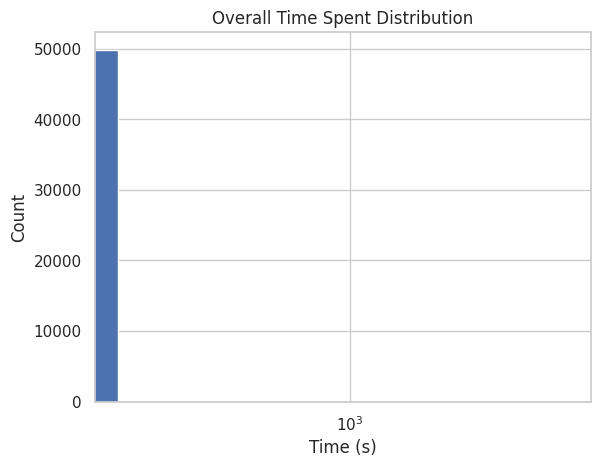

In [46]:
event_sample['overallTimeSpent'].hist(bins=50)
plt.title('Overall Time Spent Distribution')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.xscale('log')
plt.show()


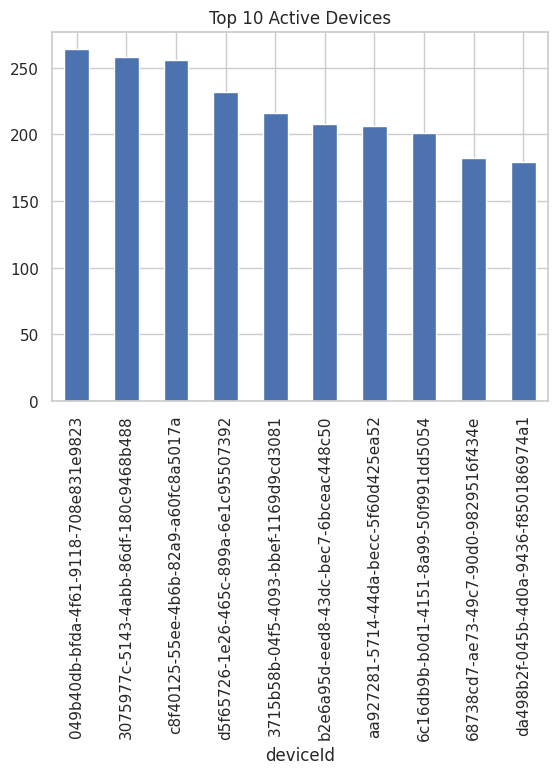

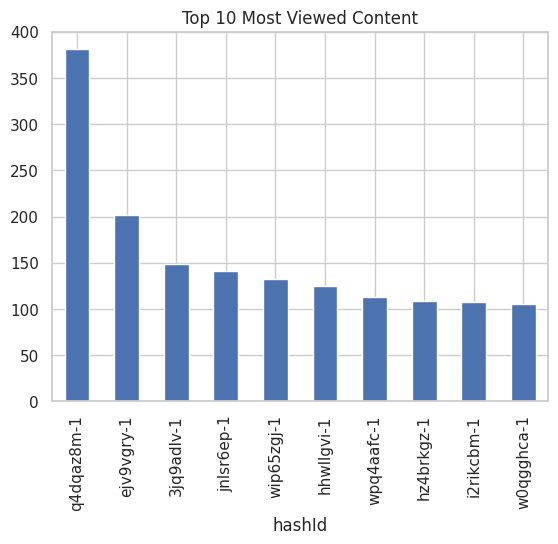

In [47]:
# User activity count
user_event_counts = event_sample['deviceId'].value_counts().head(10)
user_event_counts.plot(kind='bar', title='Top 10 Active Devices')
plt.show()

# Content popularity
top_content = event_sample['hashId'].value_counts().head(10)
top_content.plot(kind='bar', title='Top 10 Most Viewed Content')
plt.show()


In [48]:
import pandas as pd

# Efficient load of all parts (could take a minute)
event_df = pd.concat(
    [pd.read_csv(f) for f in event_parts],
    ignore_index=True
)

print("All events loaded:", event_df.shape)
event_df.head()


All events loaded: (3544161, 13)


,deviceId,event_type,eventTimestamp,hashId,categoryWhenEventHappened,cardViewPosition,overallTimeSpent,searchTerm,relevancy_color,relevancy_topic,state,locality,district
0,7cb933f6-0a5b-477e-bb5d-42eb4b771970,TimeSpent-Front,1689189015000,2k4lruyx-1,My Feed,13.0,2.165,NaN,NaN,NaN,NaN,NaN,NaN
1,a1bfc2e4-c03e-4c1b-8abb-215808a89e6a,TimeSpent-Front,1689182865000,2k4lruyx-1,My Feed,17.0,3.306,NaN,NaN,NaN,NaN,NaN,NaN
2,1c53a149-303d-486e-ac62-0b9c9e469cda,TimeSpent-Front,1689180216000,2k4lruyx-1,My Feed,17.0,4.695,NaN,NaN,NaN,NaN,NaN,NaN
3,fea7a467-551c-4b64-ad48-eae0693635f3,TimeSpent-Front,1689173651000,2kk4ydgg-1,My Feed,25.0,4.238,NaN,NaN,NaN,NaN,NaN,NaN
4,1ef62ab0-e5da-4cb4-9839-49ac52f04ceb,TimeSpent-Front,1689174004000,2kk4ydgg-1,My Feed,12.0,0.931,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Convert timestamp
event_df['event_datetime'] = pd.to_datetime(event_df['eventTimestamp'], unit='ms', errors='coerce')

# Drop mostly-empty search-related columns
event_df.drop(columns=['searchTerm', 'relevancy_color', 'relevancy_topic', 'state', 'locality', 'district'], inplace=True)

# Optional: Filter to only valid content events (if needed)
event_df = event_df[~event_df['event_type'].isin(['Search', 'Option Selected'])]

print(event_df.shape)
event_df.head()


(3543038, 8)


,deviceId,event_type,eventTimestamp,hashId,categoryWhenEventHappened,cardViewPosition,overallTimeSpent,event_datetime
0,7cb933f6-0a5b-477e-bb5d-42eb4b771970,TimeSpent-Front,1689189015000,2k4lruyx-1,My Feed,13.0,2.165,2023-07-12 19:10:15
1,a1bfc2e4-c03e-4c1b-8abb-215808a89e6a,TimeSpent-Front,1689182865000,2k4lruyx-1,My Feed,17.0,3.306,2023-07-12 17:27:45
2,1c53a149-303d-486e-ac62-0b9c9e469cda,TimeSpent-Front,1689180216000,2k4lruyx-1,My Feed,17.0,4.695,2023-07-12 16:43:36
3,fea7a467-551c-4b64-ad48-eae0693635f3,TimeSpent-Front,1689173651000,2kk4ydgg-1,My Feed,25.0,4.238,2023-07-12 14:54:11
4,1ef62ab0-e5da-4cb4-9839-49ac52f04ceb,TimeSpent-Front,1689174004000,2kk4ydgg-1,My Feed,12.0,0.931,2023-07-12 15:00:04


In [50]:
event_df = event_df.merge(devices, left_on='deviceId', right_on='deviceid', how='left')
print("After device join:", event_df.shape)


After device join: (3543038, 16)


In [51]:
event_df = event_df.merge(content_train, left_on='hashId', right_on='hashid', how='left')
print("After content join:", event_df.shape)


After content join: (3543038, 27)


In [52]:
user_features = event_df.groupby('deviceId').agg({
    'event_type': 'count',
    'overallTimeSpent': 'sum',
    'hashId': pd.Series.nunique,
    'event_datetime': ['min', 'max']
})

user_features.columns = ['event_count', 'total_time_spent', 'unique_content_count', 'first_seen', 'last_seen']
user_features['active_days'] = (user_features['last_seen'] - user_features['first_seen']).dt.days + 1
user_features = user_features.reset_index()
user_features.head()


,deviceId,event_count,total_time_spent,unique_content_count,first_seen,last_seen,active_days
0,0002d448-f398-44d8-8806-df93d1dc770b,369,2384.661,316,2023-06-27 04:13:22,2023-07-18 14:03:21,22
1,000d4df6-dbdd-4438-8456-e23a6f52e1c5,2164,23894.712,1838,2023-06-27 07:36:40,2023-07-25 21:40:45,29
2,00198103-e45e-4b33-804b-84ff19562d62,1832,21090.126,1289,2023-06-30 12:32:56,2023-07-25 13:24:35,26
3,002a4793-c451-4916-b6c4-6a31c98cbd7c,1,7.118,1,2023-07-04 08:21:01,2023-07-04 08:21:01,1
4,002da5aa-573b-441c-941b-df5597f1637e,287,1917.221,245,2023-06-27 17:59:24,2023-07-25 10:13:50,28


In [53]:
content_features = event_df.groupby('hashId').agg({
    'event_type': 'count',
    'deviceId': pd.Series.nunique,
    'overallTimeSpent': 'mean'
}).reset_index()

content_features.columns = ['hashId', 'event_count', 'unique_viewers', 'avg_time_spent']
content_features.head()


,hashId,event_count,unique_viewers,avg_time_spent
0,006ltwgp-1,18,12,9.312778
1,006ltwgp-2,543,443,8.517142
2,00jltjxg-1,335,273,5.174681
3,00wj0hjn-2,1,1,0.304000
4,01cq74z9-1,7,3,4.922000


In [54]:
user_features.to_csv("user_features.csv", index=False)
content_features.to_csv("content_features.csv", index=False)
